# Creating a Relational Network for Ibn Hanbal from the Tarajem Dataset
    

In [1]:
# Ibn Hanbal Entry

vec1 = [" الإمام ابن حنبل  أحمد بن محمد بن حنبل، أبو عبد الله، الشيباني الوائلي: إمام المذهب الحنبلي، وأحد الأئمة الأربعة. أصله من مرو، وكان أبوه والى سرخس. وولد ببغداد. فنشأ منكبا على طلب العلم، وسافر في سبيله أسفارا كبيرة إلى الكوفة والبصرة ومكة والمدينة واليمن والشام والثغور والمغرب والجزائر والعراقين وفارس وخراسان والجبال والأطراف. وصنف (المسند - ط) ستة مجلدات، يحتوي على ثلاثين ألف حديث. وله كتب في (التاريخ) و (الناسخ و المنسوخ) و (الرد على من ادعى التناقض في القرآن) و (التفسير) و (فضائل الصحابة) و (المناسك) و (الزهد) و (الأشربة - خ) و (المسائل - خ) و (علل الحديث - خ) وكان أسمر اللون، حسن الوجه، طويل القامة، يلبس الأبيض ويخضب رأسه ولحيته بالحناء. وفي أيامه دعا المأمون إلى القول بخلق القرآن ومات قبل أن يناظر ابن حنبل، وتولى المعتصم فسجن ابن حنبل ثمانية وعشرين شهرا لامتناعه عن القول بخلق القرآن، وأطلق سنة 220هـ. ولم يصبه شر في زمن الواثق بالله - بعد المعتصم - ولما توفى الواثق وولى أخوه المتوكل ابن المعتصم أكرم الإمام ابن حنبل وقدمه، ومكث مدة لا يولى أحدا إلا بمشورته، وتوفى الإمام وهو على تقدمه عند المتوكل. ومما صنف في سيرته (مناقب الإمام أحمد لابن الجوزي، و ابن حنبل لمحمد أبي زهرة، من معاصرينا"]

# Function for text cleaning

In [2]:
# CLEAN Arabic data
# coding=utf-8
import re
import string
import sys
import argparse

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations




arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text) # the second char is the one used
    text = re.sub("ى", "ي", text) #the first char is the one that will be used
    #text = re.sub("ؤ", "ء", text)
    #text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text
    
def delete_eng(txt):
    txt = re.sub(r'[a-zA-Z]+', ' ', txt, flags=re.I)
    txt = re.sub(r'\W', ' ', txt, flags = re.I) # would remove emoji (any non-char)
    txt = re.sub(r'\d+', ' ', txt)#remove numbers
    txt = re.sub('https?://[A-Za-z0-9./]+','',txt)#replace URLs
    txt=re.sub(r'@[A-Z0-9a-z_:]+','',txt)#replace username-tags
    txt=re.sub(r'^[RT]+','',txt)#replace RT-tags
    txt=re.sub(r' +', ' ', txt)#remove extra spaces
    return txt

def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

def remove_repeating_char(text):
    return re.sub(r'(.)\1{2,}', r'\1', text) #added {2,} to avoid taking double words out

In [3]:
def clean(text):
    return delete_eng(remove_diacritics(remove_punctuations(remove_repeating_char(normalize_arabic(text)))))

In [4]:
import numpy as np
import pandas as pd
import nltk

# The Tarajem Dataset

In [5]:
data = pd.read_excel("DATA/tarajem_with_features_original.xlsx")

In [6]:
data.head()

,age,gender,name,summary,Birthplace,Place_of_Death,DOB_AD,DOB_AH,DOD_AD,DOD_AH
0,العثماني,رجال,شريفي,شريفي إبراهيم بن حسام الدين الكرمياني، المعرو...,NaN,NaN,1572م,- 980هـ,1607م,- 1016هـ
1,المملوكي,رجال,ابن النقيب,ابن النقيب أحمد بن لؤلؤ بن عبد الله الرومي. أ...,مولده ووفاته بالقاهرة كان أبوه,مولده ووفاته بالقاهرة كان أبوه روميا,1302م,- 702هـ,1368م,- 769هـ
2,الفاطمي,رجال,ابن الشبل البغدادي,ابن الشبل البغدادي محمد بن الحسين بن عبد الله...,من أهل بغداد، مولدا ووفاة,NaN,NaN,NaN,1080م,- 473هـ
3,الفاطمي,رجال,خواهر زاده,خواهر زاده محمد بن الحسين بن محمد، أبو بكر ال...,مولده ووفاته في بخارى.,مولده ووفاته في بخارى. له ’’,NaN,NaN,1090م,- 483هـ
4,الفاطمي,رجال,الأسفراييني,الأسفراييني محمد بن الحسين بن محمد بن طلحة، أ...,من أهل أسفرايين. سمع الحديث,NaN,NaN,NaN,1094م,- 487هـ


In [7]:
len(data)

45492

In [8]:
# delete nans in summary

data = data[~data['summary'].isnull()]

# Apply the clean function on the biographical entries

In [9]:
data['summary']= data['summary'].astype(str).apply(clean)

In [10]:
data['summary'].isnull().sum()

0

In [11]:
summary = data['summary'].tolist()

In [12]:
names = data['name'].tolist()

# Transform Text to tf-idf values

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer()
# base_document = "This is an example sentence for the document to be compared"
embeddings = tfidf_vectorizer.fit_transform(summary)  # takes a list of strings


# similarities = []



# for s in summaries:            
#     s.insert(0, vec1)
#     embeddings = tfidf_vectorizer.fit_transform(s)

#      cosine_similarities = cosine_similarity(embeddings[0,:], embeddings[1,:]).flatten()

#     similarities.append(cosine_similarities)

# Transform Ibn-hanbal text to tf-idf

In [15]:
vec_trans = tfidf_vectorizer.transform(vec1) #ibn hanbal short

 # calculate cosine similarity

In [16]:
cosine = cosine_similarity(vec_trans, embeddings).flatten() # calculate similarity

In [17]:
cos_sim = cosine.tolist() # return a list of the numpy array 

In [20]:
cosine[0:2]

array([0.01050009, 0.03652416])

In [18]:
cosine_sime_sum = sorted(list(zip(cos_sim,summary)),reverse=True) # zip the summary with the sorted similarities

In [19]:
cosine_sime_sum[0:100] # with ibn hanbal long

[(0.8679172719405572,
  'الامام ابن حنبل احمد بن محمد بن حنبل ابو عبد الله الشيباني الوائلي امام المذهب الحنبلي واحد الائمه الاربعه اصله من مرو وكان ابوه والي سرخس وولد ببغداد فنشا منكبا علي طلب العلم وسافر في سبيله اسفارا كبيره الي الكوفه والبصره ومكه والمدينه واليمن والشام والثغور والمغرب والجزائر والعراقين وفارس وخراسان والجبال والاطراف وصنف المسند ط سته مجلدات يحتوي علي ثلاثين الف حديث وله كتب في التاريخ و الناسخ و المنسوخ و الرد علي من ادعي التناقض في القران و التفسير و فضائل الصحابه و المناسك و الزهد و الاشربه خ و المسائل خ و علل الحديث خ وكان اسمر اللون حسن الوجه طويل القامه يلبس الابيض ويخضب راسه ولحيته بالحناء وفي ايامه دعا المامون الي القول بخلق القران ومات قبل ان يناظر ابن حنبل وتولي المعتصم فسجن ابن حنبل ثمانيه وعشرين شهرا لامتناعه عن القول بخلق القران واطلق سنه ه ولم يصبه شر في زمن الواثق بالله بعد المعتصم ولما توفي الواثق وولي اخوه المتوكل ابن المعتصم اكرم الامام ابن حنبل وقدمه ومكث مده لا يولي احدا الا بمشورته وتوفي الامام وهو علي تقدمه عند المتوكل ومما صنف في سيرته مناق

In [23]:
similarities2 = []
for e in embeddings:
    similarities2.extend(cosine_similarity(vec_trans, e).flatten())

In [24]:
cosine_sime_short = sorted(list(zip(similarities2,summary)),reverse=True) # zip the summary with the sorted similarities

In [3]:
cosine_sime_short[:20]

In [ ]:
# Similarity with Al Muatasem

In [140]:
#al mutasem
mu = ['''المعتصم بالله زكريا بن ابراهيم بن الحاكم بامر الله احمد بن محمد العباسي ابو يحيي المعتصم بالله من خلفاء العباسيين بمصر نصب خليفه في القاهره
      بعد خلع المتوكل علي الله محمد بن ابي بكر سنه ه فاقام عشرين يوما
      وعزل ثم اعيد وبويع بالخلافه بعد موت اخيه الواثق بالله عمر بن ابراهيم سنه ه فاستمر الي ان خلع سنه ه ولزم داره الي ان مات 
 حنبل بن كعب''']
mu_trans = tfidf_vectorizer.transform(mu)

In [5]:
cosine_mu = cosine_similarity(mu_trans, embeddings).flatten()
cos_sim_mu = cosine_mu.tolist()
cosine_sime_sum_mu = sorted(list(zip(cos_sim_mu,summary)),reverse=True)
cosine_sime_sum_mu[:50]

In [22]:
# Ibn Dawud
dawud = [''' ابن ابي دواد احمد بن ابي دواد بن جرير بن مالك الايادي ابو عبد الله
احد القضاه المشهورين من المعتزله وراس فتنه القول بخلق القران قدم به ابوه وهو حدث من قنسرين بين حلب ومعره النعمان الي دمشق
فنشا فيها ونبغ ومنها رحل الي العراق وقيل ولد بالبصره قال ابو العيناء ما رايت رئيسا قط افصح ولا انطق من ابي دواد وهو اول من افتتح الكلام مع الخلفاء وكانوا
لا يبداهم احد حتي يبداوه وكان عارفا بالاخبار والانساب وفيه يقول المامون اذا استجاس الناس فاضلا فمثل احمد وكان يقال اكرم من كان في دوله بني العباس البرامكه
ثم ابن ابي دواد وكان شديد الدهاء محبا للخير اتصل اولا بالمامون فلما قرب موته اوصي به اخاه المعتصم فجعله قاضي قضاته وجعل يستشيره في امور الدوله كلها
ولما مات المعتصم اعتمد الواثق علي رايه ومات الواثق راضيا عنه وتول المتوكل ففلج ابن ابي دواد في اول خلافته سنه ه وتوفي مفلوجا بغداد قال الذهبي
كان جهميا بغيضا حمل الخلفاء علي امتحان الناس بخلق القران ولولا ذلك لاجتمعت الالسنه عليه ''']
dawud_trans = tfidf_vectorizer.transform(dawud)

In [24]:
cosine_dawud = cosine_similarity(dawud_trans, embeddings).flatten()
cos_sim_dawud = cosine_dawud.tolist()
cosine_sime_sum_dawud = sorted(list(zip(cos_sim_dawud,names)),reverse=True)
cosine_sime_sum_dawud[:50]

[(1.0000000000000007, 'ابن أبي دواد'),
 (0.24874864339201078, 'هجاس الإيادي'),
 (0.18458571968410784, 'أحمد بن حنبل'),
 (0.16596778663293005, 'الخزاعي'),
 (0.16402424439993427, 'الحسين بن الضحاك بن ياسر الباهلي، أبو علي'),
 (0.15976985784110545,
  'علي الرضا بن موسى الكاظم بن جعفر الصادق بن محمد الباقر بن علي زين العابدين بن الحسين بن علي بن أبي طالب، أبو الحسن'),
 (0.1558409461027395,
  'علي الهادي ابن محمد الجواد بن علي الرضا بن موسى الكاظم بن جعفر الصادق بن محمد الباقر بن علي زين العابدين بن الحسين بن علي بن أبي طالب، أبو الحسن'),
 (0.15570453437637624, 'النبي صلى الله عليه وآله وسلم'),
 (0.15207484312817054, 'ابن المأمون'),
 (0.1515998940003958, 'إبراهيم بن العباس الصولي بن محمد'),
 (0.1507157207737239, 'الواثق بالله'),
 (0.14770955429711496,
  'الحسن العسكري ابن علي الهادي بن محمد الجواد بن علي الرضا ابن موسى الكاظم بن جعفر الصادق بن محمد الباقر بن علي زين العابدين بن الحسين بن علي بن أبي طالب\u200f، أبو محمد'),
 (0.14670265199423618,
  'الحسين بن عبد الله بن الحسين بن علي بن سينا

### Each one of them is related to Ibn Hanbal.

In [26]:
cosine_sime_names = sorted(list(zip(cos_sim,names)),reverse=True) # zip the similarities with the names

In [27]:
cosine_sime_names[0:10]

[(0.8679172719405572, 'أحمد بن حنبل'),
 (0.29687373705616427, 'حنبل بن إسحاق'),
 (0.20656675364291535, 'الواثق بالله'),
 (0.1880741246432039, 'شريك بن شرحبيل'),
 (0.18485456712202497, 'المعتصم بالله'),
 (0.17985162067373175, 'حنبل بن كعب'),
 (0.17655257669149002, 'عبد الله بن أحمد'),
 (0.16928470166369147, 'حنبل بن خارجة'),
 (0.16146908469364615, 'ابن المتوكل'),
 (0.16086708253032486, 'ابن المأمون')]

In [53]:
# create DataFrame using data of smilarities and names
df_cosine = pd.DataFrame.from_records(cosine_sime_names, columns =['Cosine_similarity', 'Name'])

In [54]:
df_cosine.head(10)

,Cosine_similarity,Name
0,0.867917,أحمد بن حنبل
1,0.296874,حنبل بن إسحاق
2,0.206567,الواثق بالله
3,0.188074,شريك بن شرحبيل
4,0.184855,المعتصم بالله
5,0.179852,حنبل بن كعب
6,0.176553,عبد الله بن أحمد
7,0.169285,حنبل بن خارجة
8,0.161469,ابن المتوكل
9,0.160867,ابن المأمون


In [30]:
df_cosine = df_cosine[:10] # take the most similar persons to IBN HANBAL

In [31]:
!pip install --upgrade arabic-reshaper #for making Arabic letters read right

ERROR: Invalid requirement: '#for'


In [4]:
!pip install --upgrade arabic-reshaper python-bidi pillow # needed for the above package

Requirement already up-to-date: arabic-reshaper in c:\users\sadan\appdata\local\continuum\anaconda3\envs\old_env\lib\site-packages (2.1.3)
Requirement not upgraded as not directly required: future in c:\users\sadan\appdata\local\continuum\anaconda3\envs\old_env\lib\site-packages (from arabic-reshaper) (0.18.2)
Requirement not upgraded as not directly required: setuptools in c:\users\sadan\appdata\local\continuum\anaconda3\envs\old_env\lib\site-packages (from arabic-reshaper) (39.1.0)
Requirement not upgraded as not directly required: six in c:\users\sadan\appdata\local\continuum\anaconda3\envs\old_env\lib\site-packages (from python-bidi) (1.11.0)
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0


thinc 6.10.3 requires msgpack<1.0.0,>=0.5.6, which is not installed.
msgpack-numpy 0.4.4.3 requires msgpack>=0.5.2, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
conda 4.10.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
transquest 0.2.5 has requirement tokenizers==0.8.0, but you'll have tokenizers 0.8.0rc4 which is incompatible.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.19.0 which is incompatible.
spacy 2.0.13 has requirement msgpack-numpy<0.29,<0.4.4.0murmurhash>=0.28, but you'll have msgpack-numpy 0.4.4.3 which is incompatible.
spacy 2.0.13 has requirement regex==2018.01.10, but you'll have regex 2020.6.8 which is incompatible.
gensim 3.8.3 has requirement Cython==0.29.14, but you'll have cython 0.29.23 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\sadan\\AppData\\Local\\Temp\\pip-uninstall-y1tvv4jd\\users\\sadan\\ap

In [32]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

In [43]:
# reshaping the arabic words to show correctly on matplotlib (have to reshape the data column first)

x = []

for item in df_cosine.Name.values:
    x.append(get_display(arabic_reshaper.reshape(item)))

C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


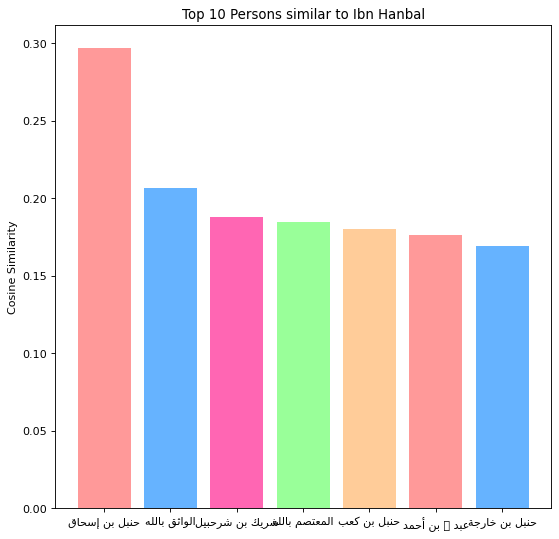

In [44]:
# bar graph for most similar 5 persons to IBN HANBAL

y = df_cosine.Cosine_similarity.values # the similarity values
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

x = x[1:8]
y = y[1:8]
my_colors = ['#ff9999','#66b3ff','#ff66b3','#99ff99','#ffcc99'] # you can also have my_colors = 'rgbkymc'
plt.bar(x, y, color=my_colors)
#plt.xlabel('Top Phrases')
plt.ylabel('Cosine Similarity')
plt.title('Top 10 Persons similar to Ibn Hanbal')
#plt.gca().invert_yaxis()
plt.show()

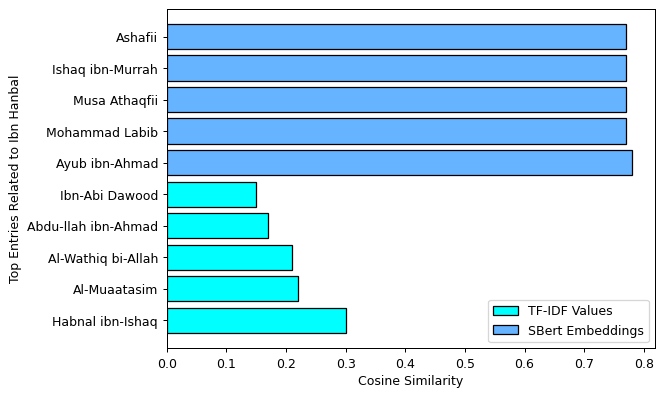

In [55]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (7,5),dpi=90)
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(['Habnal ibn-Ishaq',  'Al-Muaatasim','Al-Wathiq bi-Allah','Abdu-llah ibn-Ahmad', 'Ibn-Abi Dawood'], 
         [0.30, 0.22, 0.21,0.17,  0.15 ], label = "TF-IDF Values", 
          color='cyan', edgecolor = 'black')
plt.barh(['Ayub ibn-Ahmad', 'Mohammad Labib', 'Musa Athaqfii', 'Ishaq ibn-Murrah', 'Ashafii'], 
         [0.78, 0.77, 0.77, 0.77, 0.77], label = "SBert Embeddings", 
          edgecolor = 'black',color = '#66b3ff')
# Creating the legend of the bars in the plot
plt.legend()
# Namimg the x and y axis
plt.xlabel('Cosine Similarity')
plt.ylabel('Top Entries Related to Ibn Hanbal')
# Giving the tilte for the plot
# plt.title('Top ten countries most affected by\n coronavirus')
# Saving the plot as a 'png'
# plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

In [25]:

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df_cosine['Cosine_similarity'] = df_cosine['Cosine_similarity'].apply(lambda x: x*100)  # multiply similarities for a better graph

In [56]:
df_cosine['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x))) # the reshaping can be applied to to the column

0              ﻞﺒﻨﺣ ﻦﺑ ﺪﻤﺣﺃ
1             ﻕﺎﺤﺳﺇ ﻦﺑ ﻞﺒﻨﺣ
2              ﻪﻠﻟﺎﺑ ﻖﺛﺍﻮﻟﺍ
3            ﻞﻴﺒﺣﺮﺷ ﻦﺑ ﻚﻳﺮﺷ
4             ﻪﻠﻟﺎﺑ ﻢﺼﺘﻌﻤﻟﺍ
                ...        
45486         ﺮﺧﺁ ،ﺔﻴﻣﺃ ﻮﺑﺃ
45487      ﻱﺮﻴﺸﻘﻟﺍ ﺔﻴﻣﺃ ﻮﺑﺃ
45488       ﻱﺭﺰﺠﻟﺍ ﺪﻤﺣﺃ ﻮﺑﺃ
45489    ﺖﻠﺼﻟﺍ ﻲﺑﺃ ﺖﻨﺑ ﺔﻨﻣﺁ
45490                   ﺔﻏﺁ
Name: Name, Length: 45491, dtype: object

In [58]:
df_cosine.head(10)

,Cosine_similarity,Name
0,86.791727,أحمد بن حنبل
1,29.687374,حنبل بن إسحاق
2,20.656675,الواثق بالله
3,18.807412,شريك بن شرحبيل
4,18.485457,المعتصم بالله
5,17.985162,حنبل بن كعب
6,17.655258,عبد الله بن أحمد
7,16.928470,حنبل بن خارجة
8,16.146908,ابن المتوكل
9,16.086708,ابن المأمون


In [64]:
df_cosine_sm = df_cosine.loc[df_cosine['Cosine_similarity']>11, :]  
len(df_cosine_sm)

54

In [71]:
df_cosine_sm.tail()

,Cosine_similarity,Name,source
49,11.187293,ﺍﺑﻦ ﺍﻟﻌﻜﺒﺮﻱ,أحمد بن حنبل
50,11.132357,ﻧﺎﻓﻊ ﺑﻦ ﻋﻤﺮ,أحمد بن حنبل
51,11.128863,ﺃﺑﻮ ﻋﺒﺪ ﷲ ﺃﺣﻤﺪ ﺑﻦ ﺇﺑﺮﺍﻫﻴﻢ ﺑﻦ ﺇﺳﻤﺎﻋﻴﻞ,أحمد بن حنبل
52,11.118632,ﺟﺮﻳﺮ ﺑﻦ ﻋﺒﺪ ﺍﻟﺤﻤﻴﺪ ﺍﻟﻀﺒﻲ ﺍﻟﻜﻮﻓﻲ ﻧﺰﻳﻞ ﺍﻟﺮﻱ,أحمد بن حنبل
53,11.030264,ﺍﻟﺴﻌﺪﻱ,أحمد بن حنبل


In [65]:
df_cosine_sm['source'] = "أحمد بن حنبل"

C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
# reshaping name and source columns
df_cosine_sm['Name']= df_cosine_sm['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
# df_cosine['source']= df_cosine['source'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_cosine_sm2 = df_cosine_sm.loc[df_cosine['Cosine_similarity']>11, :] 

In [27]:
# networkx creates a network class from the data set 
import networkx as nx
# # load pandas df as networkx graph
# G = nx.from_pandas_edgelist(df_cosine_sm, 
#                             source='source', # define the node
#                             target='Name', # define the node to
#                             edge_attr='Cosine_similarity') # define the edges
# print("No of unique names:", len(G.nodes))
# print("No of connections:", len(G.edges))

# Visualiza NETWORK X 

In [86]:
n = ['أحمد بن حنبل']

G_symmetric = nx.Graph()
G_symmetric.add_edge(get_display(arabic_reshaper.reshape('أحمد بن حنبل')),'Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')


In [28]:
G_weighted = nx.Graph()
G_weighted.add_edge('Ahmad ibn_Hanbal','Hanbal ibn_Ishaq',  weight=30)
G_weighted.add_edge('Ahmad ibn_Hanbal','Al-Wathiq biAllah',weight=21)
G_weighted.add_edge('Ahmad ibn_Hanbal','Abdu-llah ibn_Ahmad', weight=16)
G_weighted.add_edge('Ahmad ibn_Hanbal','Ibn-Abi Dawood',weight=15)
G_weighted.add_edge('Ahmad ibn_Hanbal','Ibn-al-Mamun',weight=15)
G_weighted.add_edge('Ahmad ibn_Hanbal','Ibn-Maymun',weight=10)
G_weighted.add_edge('Ahmad ibn_Hanbal','Al-Hakam Al-Masry', weight=9)

G_weighted.add_edge('AL-Muatasim','Al-Muadad', weight=31)
G_weighted.add_edge('AL-Muatasim','Al-Wathiq biAllah', weight=30)
G_weighted.add_edge('AL-Muatasim','Al-Mustamsik', weight=28)
G_weighted.add_edge('AL-Muatasim','Ahmad ibn_Hanbal', weight=22)
G_weighted.add_edge('AL-Muatasim','Ibn-al-Mamun', weight=21)

G_weighted.add_edge('Ibn-Abi Dawood','Ahmad ibn_Hanbal', weight=16)
G_weighted.add_edge('Ibn-Abi Dawood','Al-Khuzaai', weight=16)
G_weighted.add_edge('Ibn-Abi Dawood','Ibn-Addahak', weight=15)
G_weighted.add_edge('Ibn-Abi Dawood','Ibn-al-Mamun', weight=15)
G_weighted.add_edge('Ibn-Abi Dawood','Al-Wathiq biAllah', weight=14)
G_weighted.add_edge('Ibn-Abi Dawood','AL-Muatasim', weight=13)





In [80]:
arabic_reshaper.reshape('أحمد بن حنبل')

'ﺃﺣﻤﺪ ﺑﻦ ﺣﻨﺒﻞ'

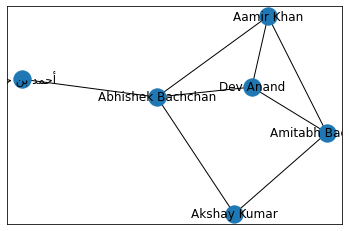

In [84]:
nx.draw_networkx(G_symmetric)

# Option 1: NetworkX (counter-intuitive)


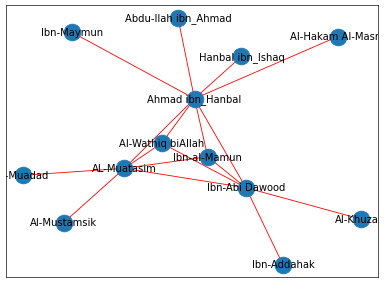

In [29]:
# all graph options, change the index 6 to get different figures 
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 1
colors = nx.get_edge_attributes(G_weighted,'color').values()
weights = nx.get_edge_attributes(G_weighted,'weight').values()

#pos = nx.circular_layout(G)
# plt.figure(figsize=(8,8), dpi=60) 
# nx.nx.draw_networkx(G_weighted,  
#         edge_color='#ffcc99', 
#         width=list(weights),
#         with_labels=True,
#         node_color='#1f78b4',
#         node_size=500)
# plot
plt.figure(figsize=(8,6), dpi=60) 
graphs_viz_options[selected_graph_option](G_weighted,arrows=True,node_size=400,edge_color='r')

In [83]:
df_smaller = df_cosine.loc[df_cosine["Cosine_similarity"] > 12, :]

In [84]:
len(df_smaller)

32

In [85]:
df_smaller['Name']= df_smaller['Name'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
df_smaller['source']= df_smaller['source'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
G = nx.from_pandas_edgelist(df_smaller, 
                            source='source', 
                            target='Name', 
                            edge_attr='Cosine_similarity')
print("No of unique names:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique names: 33
No of connections: 32


C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


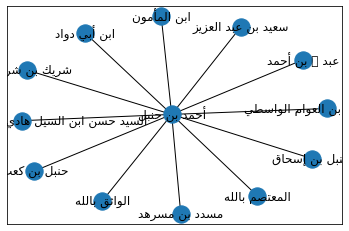

In [73]:
graphs_viz_options[selected_graph_option](G)

# Option 2: PyVis


In [81]:
!pip install pyvis


thinc 6.10.3 requires msgpack<1.0.0,>=0.5.6, which is not installed.
msgpack-numpy 0.4.4.3 requires msgpack>=0.5.2, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.
conda 4.10.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
transquest 0.2.5 has requirement tokenizers==0.8.0, but you'll have tokenizers 0.8.0rc4 which is incompatible.
tensorflow 1.10.0 has requirement numpy<=1.14.5,>=1.13.3, but you'll have numpy 1.19.0 which is incompatible.
spacy 2.0.13 has requirement msgpack-numpy<0.29,<0.4.4.0murmurhash>=0.28, but you'll have msgpack-numpy 0.4.4.3 which is incompatible.
spacy 2.0.13 has requirement regex==2018.01.10, but you'll have regex 2020.6.8 which is incompatible.
gensim 3.8.3 has requirement Cython==0.29.14, but you'll have cython 0.29.23 which is incompatible.
You are using pip version 10.0.1, however version 21.2.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [93]:
# import pyvis
from pyvis.network import Network
# create vis network
net = Network(notebook=True, width=1000, height=600)
# load the networkx graph
net.from_nx(G)
# show
net.show("example.html")
#net.show_buttons(filter_=['physics'])

In [41]:
# import pyvis
from pyvis.network import Network
# create vis network
net = Network(height='800px', width='75%', bgcolor='#ffffff', # Changed height
                font_color='black',notebook = True, directed=False)
#net.barnes_hut(spring_strength=0.006)
# load the networkx graph
net.from_nx(G_weighted)
# show
#net.show_buttons(filter_=['physics'])
net.show_buttons(filter_=True)
net.show("example4.html")

